In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datadir = '/content/drive/MyDrive/Segmented Medicinal Leaf Images'
categories = os.listdir(datadir)

In [4]:
len(categories)

30

In [5]:
from keras.preprocessing import image

In [6]:
data = []
for category in categories:
  path = os.path.join(datadir, category)
  labels = categories.index(category)
  for imgpath in os.listdir(path):
    imgs = image.load_img(os.path.join(path, imgpath),target_size=(224,224))
    data.append((imgs, labels))

In [7]:
len(data)

1835

In [8]:
import random

In [9]:
random.shuffle(data)

In [10]:
X_img = []
y_lab = []
for img , label in data:
  X_img.append(img)
  y_lab.append(label)

In [11]:
X_list = [ image.img_to_array(img) for img in X_img]

In [12]:
type(X_list)

list

In [13]:
import numpy as np

In [14]:
X = np.asarray(X_list)

In [15]:
type(X)

numpy.ndarray

In [16]:
X.shape

(1835, 224, 224, 3)

In [17]:
X /= 255

In [18]:
import matplotlib.pyplot as plt

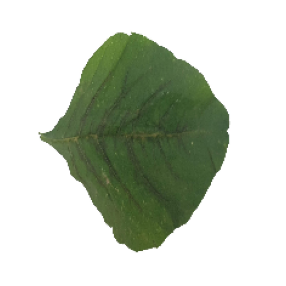

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(X[170])
plt.axis('off')
plt.show()

In [20]:
Y = np.asarray(y_lab)

In [21]:
Y.shape

(1835,)

## finally preprocessed data as X and Lables as Y

In [22]:
# import necessary library
#from keras.applications.efficientnet import EfficientNetB0
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf

In [23]:
# build model function
def build_model():

  v2model = tf.keras.applications.NASNetMobile(input_shape=(224,224,3), weights='imagenet', include_top=False)
  
  x = Flatten()(v2model.output)
  prediction = Dense(len(categories), activation='softmax')(x)

  model = Model(inputs=v2model.input, outputs=prediction)

  for layer in v2model.layers:
    layer.trainable = False
  return model



In [24]:
# 3 fold cross validation

In [25]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import Model

In [26]:
kf = KFold(n_splits=5)

In [27]:
ACCURACY = []
LOSS = []

count = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = build_model()

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    callbacks = [EarlyStopping(monitor='val_accuracy', patience=2,verbose=2),TensorBoard(log_dir=f'./logs{count}')]

    history = model.fit(X_train ,y_train,batch_size = 32,epochs = 10,verbose = 2,callbacks=callbacks ,validation_data=(X_test,y_test))
  
    results = model.evaluate(X_test, y_test)  #returns ['loss','accuracy']
    print('fold = ',count, 'loss and val_accuracy',results)

    ACCURACY.append(results[1])
    LOSS.append(results[0])

    count += 1
  
 

19996672/19993432 [==============================] - 0s 0us/step
Epoch 1/10
46/46 - 51s - loss: 4.3838 - accuracy: 0.6846 - val_loss: 0.7649 - val_accuracy: 0.8992
Epoch 2/10
46/46 - 3s - loss: 0.2929 - accuracy: 0.9435 - val_loss: 0.7301 - val_accuracy: 0.9101
Epoch 3/10
46/46 - 3s - loss: 0.3357 - accuracy: 0.9639 - val_loss: 0.5923 - val_accuracy: 0.9264
Epoch 4/10
46/46 - 3s - loss: 0.1844 - accuracy: 0.9687 - val_loss: 0.7880 - val_accuracy: 0.9155
Epoch 5/10
46/46 - 3s - loss: 0.1268 - accuracy: 0.9823 - val_loss: 0.3494 - val_accuracy: 0.9537
Epoch 6/10
46/46 - 3s - loss: 0.0969 - accuracy: 0.9850 - val_loss: 0.7548 - val_accuracy: 0.9237
Epoch 7/10
46/46 - 3s - loss: 0.0686 - accuracy: 0.9898 - val_loss: 0.5483 - val_accuracy: 0.9401
Epoch 00007: early stopping
12/12 [==============================] - 1s 60ms/step - loss: 0.5483 - accuracy: 0.9401
fold =  1 loss and val_accuracy [0.5483099222183228, 0.9400544762611389]
Epoch 1/10
46/46 - 19s - loss: 4.6488 - accuracy: 0.6689 - 

In [28]:
a=ACCURACY
a

[0.9400544762611389,
 0.863760232925415,
 0.9100817441940308,
 0.8773841857910156,
 0.9209809303283691]

In [39]:
b=LOSS
b

[0.5483099222183228,
 1.0494040250778198,
 0.5937334299087524,
 1.2410681247711182,
 0.5687034726142883]

In [40]:
# plot the loss
#plt.plot(a, label='accuracy')
#plt.plot(b, label='loss')
#plt.title("Model Stats of 5 fold cross validation")
#plt.legend()
#plt.show()
#plt.savefig('LossVal_loss')



In [41]:
#%reload_ext tensorboard

In [42]:
#%tensorboard --logdir logs1

In [43]:
#%tensorboard --logdir logs2

In [44]:
#%tensorboard --logdir logs3

In [45]:
#%tensorboard --logdir logs4

In [46]:
#%tensorboard --logdir logs5

In [47]:
#from tensorboard import notebook
#notebook.list() # View open TensorBoard instances

In [48]:
#notebook.display(port=6006, height=1000) 